In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/bs140513_032310.csv')

In [ ]:
# first 5 rows of the dataset
credit_card_data.head()
#Step: This feature represents the day from the start of simulation.
#It has 180 steps so simulation ran for virtually 6 months.

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0.0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0.0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0.0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0.0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0.0


In [ ]:
credit_card_data.tail()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
102718,37,'C808977147','2','M','28007','M855959430','28007','es_hyper',6.17,0.0
102719,37,'C481108455','3','M','28007','M85975013','28007','es_food',68.88,0.0
102720,37,'C927282395','4','F','28007','M151143676','28007','es_barsandrestaurants',9.02,0.0
102721,37,'C2066612191','2','M','28007','M1823072687','28007','es_transportation',2.63,0.0
102722,37,'C17059521','2','M','28007','M348934600','28007','es_transpor,NaN,NaN


In [ ]:
# column_to_remove = 'step'
# credit_card_data = credit_card_data.drop(column_to_remove, axis=1)

In [ ]:
# credit_card_data.head()

In [ ]:
credit_card_data.shape

(102723, 10)

In [ ]:
credit_card_data.dtypes


step             int64
customer        object
age             object
gender          object
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud          float64
dtype: object

In [ ]:
credit_card_data.isnull().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         1
fraud          1
dtype: int64

In [ ]:
credit_card_data['age'].dtype

dtype('O')

In [ ]:
credit_card_data['age']

0         '4'
1         '2'
2         '4'
3         '3'
4         '5'
         ... 
102718    '2'
102719    '3'
102720    '4'
102721    '2'
102722    '2'
Name: age, Length: 102723, dtype: object

In [ ]:
credit_card_data['age'] = credit_card_data['age'].str.replace("'", '')
credit_card_data['age'] = pd.to_numeric(credit_card_data['age'], errors='coerce')
credit_card_data['age'].replace('NA', pd.NA, inplace=True)

In [ ]:
credit_card_data['zipcodeOri'] = credit_card_data['zipcodeOri'].str.replace("'", '')
credit_card_data['zipcodeOri'] = pd.to_numeric(credit_card_data['zipcodeOri'], errors='coerce')
credit_card_data['zipcodeOri'].replace('NA', pd.NA, inplace=True)

In [ ]:
credit_card_data['zipMerchant'] = credit_card_data['zipMerchant'].str.replace("'", '')
credit_card_data['zipMerchant'] = pd.to_numeric(credit_card_data['zipMerchant'], errors='coerce')
credit_card_data['zipMerchant'].replace('NA', pd.NA, inplace=True)

In [ ]:
credit_card_data.isnull().sum()

step             0
customer         0
age            164
gender           0
zipcodeOri       0
merchant         0
zipMerchant      0
category         0
amount           1
fraud            1
dtype: int64

In [ ]:
credit_card_data.dtypes

step             int64
customer        object
age            float64
gender          object
zipcodeOri       int64
merchant        object
zipMerchant      int64
category        object
amount         float64
fraud          float64
dtype: object

<Axes: >

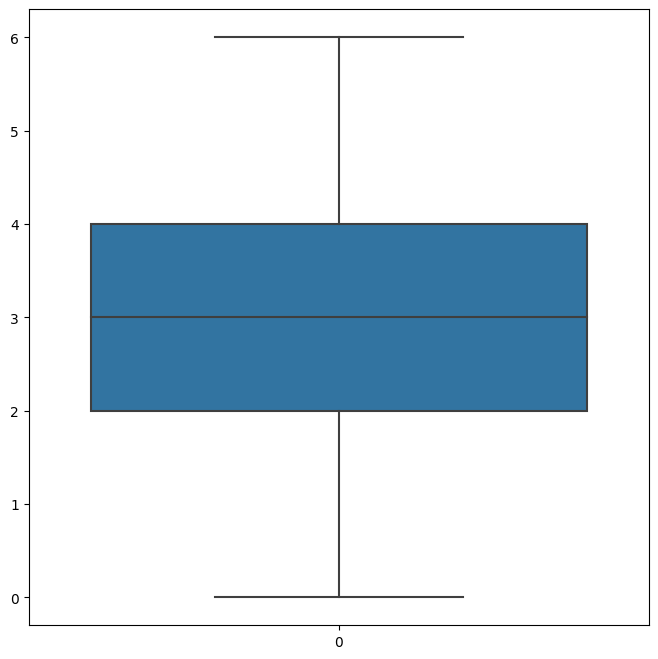

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(credit_card_data.age)
#data is peaked symmetric: mean and median can be option

In [ ]:
np.mean(credit_card_data.age)

3.0031981591084156

In [ ]:
np.median(credit_card_data.age)

nan

In [ ]:
# df = credit_card_data.dropna(subset=['age'])

In [ ]:
# np.median(df.age)

In [ ]:
#as mean median is nearly same, replacibg null values by mean
credit_card_data['age'].fillna(credit_card_data['age'].mean(), inplace=True)

In [ ]:
credit_card_data.isnull().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         1
fraud          1
dtype: int64

In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102723 entries, 0 to 102722
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         102723 non-null  int64  
 1   customer     102723 non-null  object 
 2   age          102723 non-null  float64
 3   gender       102723 non-null  object 
 4   zipcodeOri   102723 non-null  int64  
 5   merchant     102723 non-null  object 
 6   zipMerchant  102723 non-null  int64  
 7   category     102723 non-null  object 
 8   amount       102722 non-null  float64
 9   fraud        102722 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 7.8+ MB


In [ ]:
credit_card_data['fraud'].value_counts()

0.0    101214
1.0      1508
Name: fraud, dtype: int64

data is highly imbalanced

1-> fraudulent transaction

0-> normal transaction

In [ ]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.fraud == 0]
illegal = credit_card_data[credit_card_data.fraud == 1]

In [ ]:
print(legit.shape)
print(illegal.shape)

(101214, 10)
(1508, 10)


In [ ]:
legit.amount.describe()

count    101214.000000
mean         31.942522
std          33.672413
min           0.000000
25%          13.610000
50%          26.590000
75%          42.047500
max        2144.860000
Name: amount, dtype: float64

In [ ]:
illegal.amount.describe()

count    1508.000000
mean      554.087175
std       875.068881
min         1.830000
25%       155.562500
50%       325.620000
75%       559.632500
max      7432.480000
Name: amount, dtype: float64

In [ ]:
credit_card_data.groupby('fraud').mean()

<ipython-input-227-88a9b6053217>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  credit_card_data.groupby('fraud').mean()


,step,age,zipcodeOri,zipMerchant,amount
fraud,,,,,
0.0,18.926512,3.001458,28007.0,28007.0,31.942522
1.0,18.352785,3.120690,28007.0,28007.0,554.087175


In [ ]:
legit_sample = legit.sample(n=7200)

In [ ]:
new_dataset = pd.concat([legit_sample, illegal], axis=0)

In [ ]:
new_dataset.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
55493,21,'C1582366224',5.0,'M',28007,'M348934600',28007,'es_transportation',52.88,0.0
50526,19,'C585290792',4.0,'M',28007,'M85975013',28007,'es_food',70.37,0.0
44381,17,'C1645579872',5.0,'F',28007,'M348934600',28007,'es_transportation',37.47,0.0
93488,34,'C106333716',3.0,'F',28007,'M1823072687',28007,'es_transportation',44.42,0.0
15220,6,'C1421006824',2.0,'F',28007,'M348934600',28007,'es_transportation',1.18,0.0


In [ ]:
new_dataset.tail()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
102533,37,'C1994736634',4.0,'F',28007,'M980657600',28007,'es_sportsandtoys',62.40,1.0
102553,37,'C297432139',2.0,'F',28007,'M855959430',28007,'es_hyper',390.99,1.0
102554,37,'C1269288419',3.0,'M',28007,'M855959430',28007,'es_hyper',153.99,1.0
102658,37,'C1404684380',5.0,'F',28007,'M480139044',28007,'es_health',408.29,1.0
102659,37,'C375459759',2.0,'F',28007,'M480139044',28007,'es_health',669.91,1.0


In [ ]:
new_dataset['fraud'].value_counts()

0.0    7200
1.0    1508
Name: fraud, dtype: int64

In [ ]:
new_dataset.groupby('fraud').mean()

<ipython-input-233-c464c8e1e62c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_dataset.groupby('fraud').mean()


,step,age,zipcodeOri,zipMerchant,amount
fraud,,,,,
0.0,19.002083,2.972089,28007.0,28007.0,32.198667
1.0,18.352785,3.120690,28007.0,28007.0,554.087175


In [ ]:
X = new_dataset.drop(columns='fraud', axis=1)
Y = new_dataset['fraud']

In [ ]:
print(X)

        step       customer  age gender  zipcodeOri       merchant  \
55493     21  'C1582366224'  5.0    'M'       28007   'M348934600'   
50526     19   'C585290792'  4.0    'M'       28007    'M85975013'   
44381     17  'C1645579872'  5.0    'F'       28007   'M348934600'   
93488     34   'C106333716'  3.0    'F'       28007  'M1823072687'   
15220      6  'C1421006824'  2.0    'F'       28007   'M348934600'   
...      ...            ...  ...    ...         ...            ...   
102533    37  'C1994736634'  4.0    'F'       28007   'M980657600'   
102553    37   'C297432139'  2.0    'F'       28007   'M855959430'   
102554    37  'C1269288419'  3.0    'M'       28007   'M855959430'   
102658    37  'C1404684380'  5.0    'F'       28007   'M480139044'   
102659    37   'C375459759'  2.0    'F'       28007   'M480139044'   

        zipMerchant             category  amount  
55493         28007  'es_transportation'   52.88  
50526         28007            'es_food'   70.37  
44381 

In [ ]:
print(Y)

55493     0.0
50526     0.0
44381     0.0
93488     0.0
15220     0.0
         ... 
102533    1.0
102553    1.0
102554    1.0
102658    1.0
102659    1.0
Name: fraud, Length: 8708, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(8708, 9) (6966, 9) (1742, 9)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# ... (previous code)

# Step 1: Extract unique categories from both training and test datasets
unique_categories_train = {}
unique_categories_test = {}

for column in categorical_columns:
    unique_categories_train[column] = X_train[column].unique()
    unique_categories_test[column] = X_test[column].unique()

# Step 2: Handle unknown categories using a mapping strategy
unknown_category_mapping = {'customer': 'UNKNOWN_CATEGORY', 'gender': 'UNKNOWN_CATEGORY','merchant': 'UNKNOWN_CATEGORY','category': 'UNKNOWN_CATEGORY' }

for column in categorical_columns:
    X_train[column] = X_train[column].apply(lambda x: x if x in unique_categories_train[column] else unknown_category_mapping.get(column, x))
    X_test[column] = X_test[column].apply(lambda x: x if x in unique_categories_train[column] else unknown_category_mapping.get(column, x))

# Remove 'UNKNOWN_CATEGORY' values from the dataset
X_train = X_train[X_train['customer'] != 'UNKNOWN_CATEGORY']
X_test = X_test[X_test['customer'] != 'UNKNOWN_CATEGORY']

# Step 3: Preprocessing using OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)],
    remainder='passthrough'
)

# Fit and transform on training data
X_train_encoded = preprocessor.fit_transform(X_train)

# Transform only on test data (do not fit again)
X_test_encoded = preprocessor.transform(X_test)

# ... (rest of the code)


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train_encoded, Y_train)

LogisticRegression()

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train_encoded)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9496124031007752


In [ ]:
X_test_encoded = X_test_encoded.toarray()
Y_test_prediction = model.predict(X_test_encoded)
Y_test = Y_test[X_test.index]
test_data_accuracy = accuracy_score(Y_test_prediction, Y_test)
print("Test Data Accuracy:", test_data_accuracy)

Test Data Accuracy: 0.9481037924151696


In [ ]:
import numpy as np

def predict_transaction(step, customer, age, gender, zipcodeOri, merchant, zipMerchant, category, amount, model, preprocessor):
    input_data = {
        'step': [int(step)],
        'customer': [customer],
        'age': [int(age)],
        'gender': [gender],
        'zipcodeOri': [int(zipcodeOri)],
        'merchant': [merchant],
        'zipMerchant': [zipMerchant],  # Keep this as string
        'category': [category],
        'amount': [float(amount)]
    }

    input_df = pd.DataFrame(input_data)

    categorical_columns = ['customer', 'gender', 'merchant', 'category','age', 'zipcodeOri', 'step', 'amount',"zipMerchant"]
    input_encoded = preprocessor.transform(input_df[categorical_columns])

    #input_data_combined = np.concatenate([input_encoded, input_df[['age', 'zipcodeOri', 'step', 'amount']].values], axis=1)

    prediction = model.predict(input_encoded)
    if prediction[0] == 0:
        return 'Legit Transaction'
    else:
        return 'Fraud Transaction'

step = input("Enter step: ")
customer = input("Enter customer ID: ")
age = input("Enter age: ")
gender = input("Enter gender: ")
zipcodeOri = input("Enter zipcodeOri: ")
merchant = input("Enter merchant ID: ")
zipMerchant = input("Enter zipMerchant: ")
category = input("Enter category: ")

amount = input("Enter amount: ")

result = predict_transaction(step,customer, age, gender, zipcodeOri, merchant, zipMerchant, category, amount, model, preprocessor)
print("Predicted Transaction Type:", result)


KeyboardInterrupt: ignored